In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_all = pd.read_csv('train_mdf.csv')

In [49]:
df = df_all.drop(['Id'], axis=1, inplace=False)

# Data Preprocessing

## Missing Value, None, NaN 처리
- delete col : 
- object 'None' or 'NA' : 
    - Alley (NA - No alley access)
    - MasVnrType (None - None)
    - MiscFeature (NA - None)
- int 0 : 
    - LotFrontage
    - MasVnrArea
    - BsmtQual, BsmtCond (Likert object -> int, NA - No Basement),  
      BsmtExposure, BsmtFinType1, BsmtFinType2 (NA - No Basement)
    - FireplaceQu (Likert object -> int, NA - No Fireplace)
    - GarageType, GarageFinish, (NA - No Garage), GarageYrBlt,  
      GarageQual, GarageCond (Likert object -> int, NA - No Garage)  
    - PoolQC (Likert object -> int, NA - No Pool)
    - Fence (NA - No Fence)
- mode : Electrical    

In [58]:
''' # 왜 inplace = True 가 안 까?
df[['LotFrontage', 'MasVnrArea', 
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 
    'PoolQC', 'Fence']].fillna(0, inplace = True)
'''

In [65]:
# int 0 처리
df[['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']] \
= df[['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 
    'PoolQC', 'Fence']].fillna(0)

In [66]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,4,2010,WD,Normal,142125


In [63]:
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [67]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

MiscFeature    1406
Alley          1369
MasVnrType        8
Electrical        1
dtype: int64

In [68]:
df[['Alley', 'MasVnrType', 'MiscFeature']] \
= df[['Alley', 'MasVnrType', 'MiscFeature']].fillna(value = 'None')

In [69]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

Electrical    1
dtype: int64

In [83]:
df['Electrical'] = df['Electrical'].fillna(value = 'SBrkr')

In [70]:
df['Electrical'].mode()

0    SBrkr
dtype: object

In [75]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [84]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
# 값이 없으면 Series([], dtype: int64) 출력

Series([], dtype: int64)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Feature Scale 파악 및 변환
dtype과 실제 scale 특성 매치  
 - MSSubClass : int -> cat

### - int -> object

In [87]:
# df['MSSubClass'].astype(str)

In [86]:
# int -> str : MSSubClass 
df = df.astype({'MSSubClass': 'str'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### -  Likert Scale : object -> int
- ExterQual, ExterCond
- BsmtQual, BsmtCond
- HeatingQC
- KitchenQual
- FireplaceQu
- GarageQual, GarageCond
- PoolQC

- ExterQual, ExterCond
- BsmtQual, BsmtCond
- HeatingQC, PoolQC
- KitchenQual, FireplaceQu
- GarageQual, GarageCond

In [27]:
# .replace example 
# x_train['종류'].replace(['대형','중형','준중형','소형'],[0,1,2,3])

In [93]:
# ExterQual, ExterCond, 
df[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 
   'GarageQual', 'GarageCond', 'PoolQC']] \
= df[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 
   'GarageQual', 'GarageCond', 'PoolQC']].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po' : 1})

In [96]:
df['BsmtCond'].value_counts()

3    1311
4      65
2      45
0      37
1       2
Name: BsmtCond, dtype: int64

In [94]:
# PoolQC
df['PoolQC'].value_counts()

0    1453
4       5
5       2
Name: PoolQC, dtype: int64

In [95]:
# df[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond']].value_counts()

ExterQual  ExterCond  BsmtQual  BsmtCond
3          3          3         3           471
4          3          4         3           341
3          3          4         3           202
           4          3         3            65
4          3          5         3            62
5          3          5         3            41
3          3          0         0            31
4          3          3         3            25
3          4          4         3            20
           3          2         3            19
                      3         2            19
4          3          4         4            18
           4          3         3            13
3          2          3         3            12
4          4          4         3            11
3          3          3         4             8
4          4          4         4             7
3          3          4         4             7
           4          3         4             7
           3          5         3             6

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [27]:
Label Encoding
# ExterQual, ExterCond 

# BsmtQual, BsmtCond

In [27]:
df.dtypes.value_counts()

object     44
int64      33
float64     3
dtype: int64

In [31]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [98]:
cat = df.select_dtypes("object").columns

print(len(cat))
cat

34


Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [99]:
# Numerical Features including SalePrice (int64 & float64)
tNum = df.select_dtypes(exclude = 'object').columns

print(len(tNum))
tNum

46


Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'MoSold', 'YrSold',
       'SalePrice'],
      dtype='object')

In [100]:
# Numerical Features excluding SalePrice (int64 & float64)
num = tNum[:-1]

print(len(num))
num

45


Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [110]:
# 전체 데이터 기술통계량 시트 추가

In [115]:
tNum_df = df[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]

In [116]:
tNum_df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,4,3,4,...,61,0,0,0,0,0,0,2,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,3,3,4,...,0,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,4,3,4,...,42,0,0,0,0,0,0,9,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,3,3,3,...,35,272,0,0,0,0,0,2,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,4,3,4,...,84,0,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,3,3,4,...,40,0,0,0,0,0,0,8,2007,175000
1456,85.0,13175,6,6,1978,1988,119.0,3,3,4,...,0,0,0,0,0,0,0,2,2010,210000
1457,66.0,9042,7,9,1941,2006,0.0,5,4,3,...,60,0,0,0,0,0,2500,5,2010,266500
1458,68.0,9717,5,6,1950,1996,0.0,3,3,3,...,0,112,0,0,0,0,0,4,2010,142125


In [117]:
np.round(tNum_df.describe(), 2).transpose().drop(['count'], axis=1)[:24]

,mean,std,min,25%,50%,75%,max
LotFrontage,57.62,34.66,0.0,42.00,63.0,79.00,313.0
LotArea,10516.83,9981.26,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,6.10,1.38,1.0,5.00,6.0,7.00,10.0
OverallCond,5.58,1.11,1.0,5.00,5.0,6.00,9.0
YearBuilt,1971.27,30.20,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1984.87,20.65,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,103.12,180.73,0.0,0.00,0.0,164.25,1600.0
ExterQual,3.40,0.57,2.0,3.00,3.0,4.00,5.0
ExterCond,3.08,0.35,1.0,3.00,3.0,3.00,5.0
BsmtQual,3.49,0.88,0.0,3.00,4.0,4.00,5.0


In [118]:
np.round(tNum_df.describe(), 2).transpose().drop(['count'], axis=1)[24:]

,mean,std,min,25%,50%,75%,max
BedroomAbvGr,2.87,0.82,0.0,2.0,3.0,3.0,8.0
KitchenAbvGr,1.05,0.22,0.0,1.0,1.0,1.0,3.0
KitchenQual,3.51,0.66,2.0,3.0,3.0,4.0,5.0
TotRmsAbvGrd,6.52,1.63,2.0,5.0,6.0,7.0,14.0
Fireplaces,0.61,0.64,0.0,0.0,1.0,1.0,3.0
FireplaceQu,1.83,1.81,0.0,0.0,2.0,4.0,5.0
GarageYrBlt,1868.74,453.70,0.0,1958.0,1977.0,2001.0,2010.0
GarageCars,1.77,0.75,0.0,1.0,2.0,2.0,4.0
GarageArea,472.98,213.80,0.0,334.5,480.0,576.0,1418.0
GarageQual,2.81,0.72,0.0,3.0,3.0,3.0,5.0


# Trial & Error

- Categorizing 'SalePrice'

In [183]:
# 동일 길이 (equal-length buckets categorization)

bin10_el = pd.cut(df['SalePrice'], 10)

gb_el = df['SalePrice'].groupby(bin10_el)

np.round(gb_el.agg(['count', 'mean', 'std', 'min', 'max']), 2)

,count,mean,std,min,max
SalePrice,,,,,
"(34179.9, 106910.0]",148,86214.08,15995.35,34900,106500
"(106910.0, 178920.0]",723,142361.56,19760.97,107000,178900
"(178920.0, 250930.0]",373,208531.20,21206.87,179000,250580
"(250930.0, 322940.0]",135,281972.40,20974.00,251000,320000
"(322940.0, 394950.0]",51,354766.14,23245.01,324000,394617
"(394950.0, 466960.0]",19,425545.58,22179.30,395000,466500
"(466960.0, 538970.0]",4,499959.25,27672.90,475000,538000
"(538970.0, 610980.0]",3,564838.00,15690.66,555000,582933
"(610980.0, 682990.0]",2,618328.50,9434.93,611657,625000


In [187]:
bin10_el

0       (178920.0, 250930.0]
1       (178920.0, 250930.0]
2       (178920.0, 250930.0]
3       (106910.0, 178920.0]
4       (178920.0, 250930.0]
                ...         
1455    (106910.0, 178920.0]
1456    (178920.0, 250930.0]
1457    (250930.0, 322940.0]
1458    (106910.0, 178920.0]
1459    (106910.0, 178920.0]
Name: SalePrice, Length: 1460, dtype: category
Categories (10, interval[float64]): [(34179.9, 106910.0] < (106910.0, 178920.0] < (178920.0, 250930.0] < (250930.0, 322940.0] ... (466960.0, 538970.0] < (538970.0, 610980.0] < (610980.0, 682990.0] < (682990.0, 755000.0]]

In [133]:
# 동일 개수 (equal-size buckets categorization)

bin10_es = pd.qcut(df['SalePrice'], 10, labels = np.arange(1, 11))

gb_es = df['SalePrice'].groupby(bin10_es)

np.round(gb_es.agg(['count', 'mean', 'std', 'min', 'max']), 2)

,count,mean,std,min,max
SalePrice,,,,,
1,146,85936.19,15925.65,34900,106250
2,149,115286.73,5173.31,106500,124000
3,144,130121.58,3366.66,124500,135500
4,150,141416.55,3219.71,135750,147000
5,143,155136.42,4494.09,147400,163000
6,144,171691.56,4665.42,163500,179200
7,146,187710.34,5602.95,179400,198500
8,149,214336.09,9632.21,198900,230000
9,144,252606.19,14286.65,230500,278000


In [188]:
bin10_es

0       (198620.0, 230000.0]
1       (179280.0, 198620.0]
2       (198620.0, 230000.0]
3       (135500.0, 147000.0]
4       (230000.0, 278000.0]
                ...         
1455    (163000.0, 179280.0]
1456    (198620.0, 230000.0]
1457    (230000.0, 278000.0]
1458    (135500.0, 147000.0]
1459    (147000.0, 163000.0]
Name: SalePrice, Length: 1460, dtype: category
Categories (10, interval[float64]): [(34899.999, 106475.0] < (106475.0, 124000.0] < (124000.0, 135500.0] < (135500.0, 147000.0] ... (179280.0, 198620.0] < (198620.0, 230000.0] < (230000.0, 278000.0] < (278000.0, 755000.0]]

<AxesSubplot:ylabel='Count'>

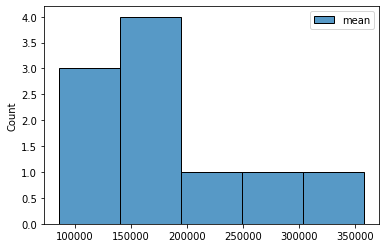

In [141]:
sns.histplot(np.round(gb_es.agg(['mean'])))

In [135]:
# # labels = False
# bin10_es = pd.qcut(df['SalePrice'], 10)
# gb_es = df['SalePrice'].groupby(bin10_es)
# np.round(gb_es.agg(['count', 'mean', 'std', 'min', 'max']), 2)

,count,mean,std,min,max
SalePrice,,,,,
"(34899.999, 106475.0]",146,85936.19,15925.65,34900,106250
"(106475.0, 124000.0]",149,115286.73,5173.31,106500,124000
"(124000.0, 135500.0]",144,130121.58,3366.66,124500,135500
"(135500.0, 147000.0]",150,141416.55,3219.71,135750,147000
"(147000.0, 163000.0]",143,155136.42,4494.09,147400,163000
"(163000.0, 179280.0]",144,171691.56,4665.42,163500,179200
"(179280.0, 198620.0]",146,187710.34,5602.95,179400,198500
"(198620.0, 230000.0]",149,214336.09,9632.21,198900,230000
"(230000.0, 278000.0]",144,252606.19,14286.65,230500,278000


+ KBinsDiscretizer 사용 방법 더 찾아보기

In [124]:
# from sklearn.preprocessing import KBinsDiscretizer

# price_arr = np.asarray(df['SalePrice']).reshape(-1, 1)

# # strategy = 'quantile' 동일한 개수
# kb = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile').fit(price_arr)

In [125]:
# price_cat = kb.transform(price_arr)

In [126]:
# print(kb.bin_edges_[0])

[ 34900. 106475. 124000. 135500. 147000. 163000. 179280. 198620. 230000.
 278000. 755000.]


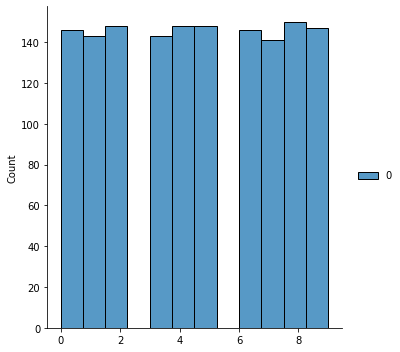

In [127]:
# sns.displot(price_cat)

In [ ]:

# # strategy = 'uniform' 동일한 간격
# kb2 = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform').fit(total_cost)
# cost_cat2 = kb2.transform(total_cost)
# cost_plot2 = sns.displot(cost_cat2)

## Groupby

In [142]:
df.groupby('YrSold').count()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
YrSold,,,,,,,,,,,,,,,,,,,,,
2006,314,314,314,314,314,314,314,314,314,314,...,314,314,314,314,314,314,314,314,314,314
2007,329,329,329,329,329,329,329,329,329,329,...,329,329,329,329,329,329,329,329,329,329
2008,304,304,304,304,304,304,304,304,304,304,...,304,304,304,304,304,304,304,304,304,304
2009,338,338,338,338,338,338,338,338,338,338,...,338,338,338,338,338,338,338,338,338,338
2010,175,175,175,175,175,175,175,175,175,175,...,175,175,175,175,175,175,175,175,175,175


In [149]:
df.groupby('MSZoning')[['YrSold']].count().unstack()

        MSZoning
YrSold  C (all)       10
        FV            65
        RH            16
        RL          1151
        RM           218
dtype: int64

In [150]:
df.groupby('YrSold')[['MSZoning']].count().unstack()

          YrSold
MSZoning  2006      314
          2007      329
          2008      304
          2009      338
          2010      175
dtype: int64

In [157]:
df.pivot(columns = ['YrSold', 'MoSold'], values ='SalePrice')

YrSold      2008      2007      2008      2006      2008 2009      2007 2009  \
MoSold        2         5         9         2         12   10        8    11   
0       208500.0       NaN       NaN       NaN       NaN  NaN       NaN  NaN   
1            NaN  181500.0       NaN       NaN       NaN  NaN       NaN  NaN   
2            NaN       NaN  223500.0       NaN       NaN  NaN       NaN  NaN   
3            NaN       NaN       NaN  140000.0       NaN  NaN       NaN  NaN   
4            NaN       NaN       NaN       NaN  250000.0  NaN       NaN  NaN   
...          ...       ...       ...       ...       ...  ...       ...  ...   
1455         NaN       NaN       NaN       NaN       NaN  NaN  175000.0  NaN   
1456         NaN       NaN       NaN       NaN       NaN  NaN       NaN  NaN   
1457         NaN       NaN       NaN       NaN       NaN  NaN       NaN  NaN   
1458         NaN       NaN       NaN       NaN       NaN  NaN       NaN  NaN   
1459         NaN       NaN       NaN       NaN       NaN  NaN       NaN  NaN   

YrSold 2008      ... 2009 2008 2009 2007 2008 2009 2006     2008 2007  
MoSold   4   1   ...   4    8    9    4    3    1    6   1    11   9   
0       NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  
1       NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  
2       NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  
3       NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  
4       NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  
...     ...  ..  ...  ...  ...  ...  ...  ...  ...  ...  ..  ...  ...  
1455    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  
1456    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  
1457    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  
1458    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  
1459    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  

[1460 rows x 55 columns]

# Data Analysis

([<matplotlib.axis.XTick at 0x21d9a6c0a88>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

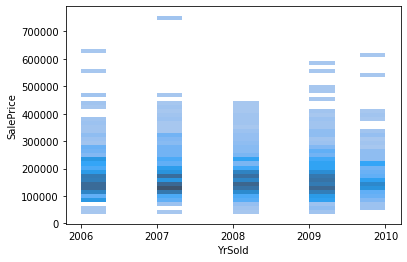

In [175]:
sns.histplot(y='SalePrice', x='YrSold', data=df)
# plt.xlim(2005, 2011)
plt.xticks(np.arange(2006, 2011))
# plt.yticks(rotation = 20)

([<matplotlib.axis.XTick at 0x21d9aaa3408>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

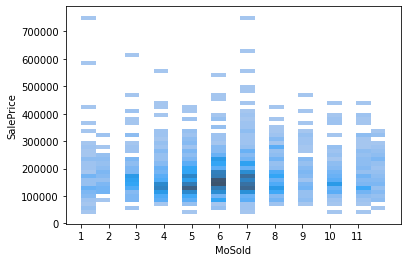

In [170]:
sns.histplot(y='SalePrice', x='MoSold', data=df)
plt.xticks(np.arange(1, 12))

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

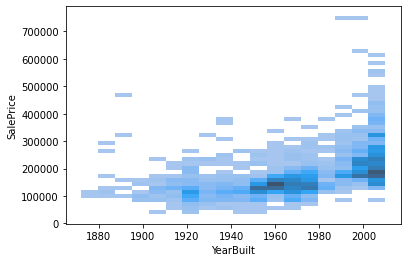

In [229]:
sns.histplot(y='SalePrice', x='YearBuilt', data=df)
# plt.xticks(np.arange(1, 12))

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

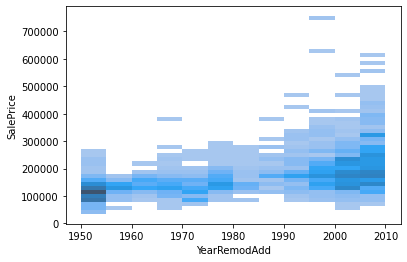

In [230]:
sns.histplot(y='SalePrice', x='YearRemodAdd', data=df)
# plt.xticks(np.arange(1, 12))

In [181]:
df.groupby('MSSubClass')[['SalePrice']].describe()

SalePrice                                                    \
               count           mean            std       min       25%   
MSSubClass                                                               
120             87.0  200779.080460   58221.490909   99500.0  158050.0   
160             63.0  138647.380952   34587.542266   75000.0  114000.0   
180             10.0  102300.000000   29474.282575   75500.0   81875.0   
190             30.0  129613.333333   35439.097670   55000.0  108875.0   
20             536.0  185224.811567   78782.189967   35311.0  132500.0   
30              69.0   95829.724638   24857.110083   34900.0   81000.0   
40               4.0  156125.000000   75747.799748   79500.0  119625.0   
45              12.0  108591.666667   20231.723889   76000.0   94125.0   
50             144.0  143302.972222   54851.983707   37900.0  114125.0   
60             299.0  239948.501672   86579.909966  129000.0  185000.0   
70              60.0  166772.416667   58206.545762   40000.0  128000.0   
75              16.0  192437.500000  100556.762577  101000.0  125625.0   
80              58.0  169736.551724   38197.808771  107000.0  147250.0   
85              20.0  147810.000000   19629.942220  123000.0  134350.0   
90              52.0  133541.076923   27833.249197   82000.0  118375.0   

                                          
                 50%       75%       max  
MSSubClass                                
120         192000.0  232000.0  392500.0  
160         146000.0  164850.0  239000.0  
180          88500.0  128000.0  148000.0  
190         128250.0  143750.0  228950.0  
20          159250.0  220000.0  611657.0  
30           99900.0  110500.0  163500.0  
40          142500.0  179000.0  260000.0  
45          107500.0  122250.0  139400.0  
50          132000.0  159000.0  410000.0  
60          215200.0  268750.0  755000.0  
70          156000.0  189500.0  359100.0  
75          163500.0  219625.0  475000.0  
80          166500.0  179425.0  345000.0  
85          140750.0  158375.0  198500.0  
90          135980.0  145000.0  206300.0

In [180]:
df.groupby('MSZoning')[['SalePrice']].describe()

SalePrice                                                    \
             count           mean           std       min        25%   
MSZoning                                                               
C (all)       10.0   74528.000000  33791.092031   34900.0   43998.25   
FV            65.0  214014.061538  52369.662067  144152.0  174000.00   
RH            16.0  131558.375000  35714.118435   76000.0  106150.00   
RL          1151.0  191004.994787  80766.341319   39300.0  137700.00   
RM           218.0  126316.830275  48521.689833   37900.0  100000.00   

                                        
               50%       75%       max  
MSZoning                                
C (all)    74700.0   98332.0  133900.0  
FV        205950.0  250000.0  370878.0  
RH        136500.0  148608.5  200000.0  
RL        174000.0  224700.0  755000.0  
RM        120500.0  140000.0  475000.0

In [192]:
noPool_idx = df[df['PoolQC'] == 0].index
pool = df.drop(noPool_idx)
pool

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,75,RL,174.0,25419,Pave,None,Reg,Lvl,AllPub,Corner,...,512,5,GdPrv,None,0,3,2006,WD,Abnorml,235000
810,20,RL,78.0,10140,Pave,None,Reg,Lvl,AllPub,Inside,...,648,4,GdPrv,None,0,1,2006,WD,Normal,181000
1170,80,RL,76.0,9880,Pave,None,Reg,Lvl,AllPub,Inside,...,576,4,GdPrv,None,0,7,2008,WD,Normal,171000
1182,60,RL,160.0,15623,Pave,None,IR1,Lvl,AllPub,Corner,...,555,5,MnPrv,None,0,7,2007,WD,Abnorml,745000
1298,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,Corner,...,480,4,0,None,0,1,2008,New,Partial,160000
1386,60,RL,80.0,16692,Pave,None,IR1,Lvl,AllPub,Inside,...,519,4,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,80,RL,0.0,19690,Pave,None,IR1,Lvl,AllPub,CulDSac,...,738,4,GdPrv,None,0,8,2006,WD,Alloca,274970


In [201]:
Pool_idx = df[df['PoolQC'] != 0].index
noPool = df.drop(Pool_idx)
noPool

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,0,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,0,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,0,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,0,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,0,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,0,None,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,MnPrv,None,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,0,None,0,4,2010,WD,Normal,142125


In [204]:
pool['SalePrice'].describe().apply("{0:,.2f}".format) # .transpose()

count          7.00
mean     288,138.57
std      206,071.85
min      160,000.00
25%      176,000.00
50%      235,000.00
75%      262,485.00
max      745,000.00
Name: SalePrice, dtype: object

In [205]:
noPool['SalePrice'].describe()['count', 'mean', 'std', 'min', 'max'] #.transpose()

count      1,453.00
mean     180,404.66
std       78,168.87
min       34,900.00
25%      129,900.00
50%      162,900.00
75%      213,500.00
max      755,000.00
Name: SalePrice, dtype: object

In [220]:
nbh_sp = df.groupby('Neighborhood')['SalePrice'].agg(['count', 'mean', 'std', 'min', 'max'])
nbh_sp

,count,mean,std,min,max
Neighborhood,,,,,
Blmngtn,17,194870.882353,30393.229219,159895,264561
Blueste,2,137500.000000,19091.883092,124000,151000
BrDale,16,104493.750000,14330.176493,83000,125000
BrkSide,58,124834.051724,40348.689270,39300,223500
ClearCr,28,212565.428571,50231.538993,130000,328000
CollgCr,150,197965.773333,51403.666438,110000,424870
Crawfor,51,210624.725490,68866.395472,90350,392500
Edwards,100,128219.700000,43208.616459,58500,320000
Gilbert,79,192854.506329,35986.779085,141000,377500


In [223]:
np.round(nbh_sp[['count', 'mean', 'std', 'min', 'max']], 2).sort_values(by=['mean'], axis=0, ascending = False)

,count,mean,std,min,max
Neighborhood,,,,,
NoRidge,41,335295.32,121412.66,190000,755000
NridgHt,77,316270.62,96392.54,154000,611657
StoneBr,25,310499.00,112969.68,170000,556581
Timber,38,242247.45,64845.65,137500,378500
Veenker,11,238772.73,72369.32,162500,385000
Somerst,86,225379.84,56177.56,144152,423000
ClearCr,28,212565.43,50231.54,130000,328000
Crawfor,51,210624.73,68866.40,90350,392500
CollgCr,150,197965.77,51403.67,110000,424870


In [224]:
mssub_sp = df.groupby('MSSubClass')['SalePrice'].agg(['count', 'mean', 'std', 'min', 'max'])
np.round(mssub_sp[['count', 'mean', 'std', 'min', 'max']], 2).sort_values(by=['mean'], axis=0, ascending = False)

,count,mean,std,min,max
MSSubClass,,,,,
60,299,239948.50,86579.91,129000,755000
120,87,200779.08,58221.49,99500,392500
75,16,192437.50,100556.76,101000,475000
20,536,185224.81,78782.19,35311,611657
80,58,169736.55,38197.81,107000,345000
70,60,166772.42,58206.55,40000,359100
40,4,156125.00,75747.80,79500,260000
85,20,147810.00,19629.94,123000,198500
50,144,143302.97,54851.98,37900,410000


In [227]:
mszone_sp = df.groupby('MSZoning')['SalePrice'].agg(['count', 'mean', 'std', 'min', 'max'])
np.round(mszone_sp[['count', 'mean', 'std', 'min', 'max']], 2).sort_values(by=['mean'], axis=0, ascending = False)

,count,mean,std,min,max
MSZoning,,,,,
FV,65,214014.06,52369.66,144152,370878
RL,1151,191004.99,80766.34,39300,755000
RH,16,131558.38,35714.12,76000,200000
RM,218,126316.83,48521.69,37900,475000
C (all),10,74528.00,33791.09,34900,133900


In [228]:
saleType_sp = df.groupby('SaleType')['SalePrice'].agg(['count', 'mean', 'std', 'min', 'max'])
np.round(saleType_sp[['count', 'mean', 'std', 'min', 'max']], 2).sort_values(by=['mean'], axis=0, ascending = False)

,count,mean,std,min,max
SaleType,,,,,
New,122,274945.42,103239.58,113000,611657
Con,2,269600.00,76933.22,215200,324000
CWD,4,210600.00,86421.49,136000,328900
ConLI,5,200390.00,145282.52,110000,451950
WD,1267,173401.84,71129.69,34900,755000
COD,43,143973.26,47098.29,60000,287000
ConLw,5,143700.00,67291.90,60000,212000
ConLD,9,138780.89,53876.56,79900,235128
Oth,3,119850.00,28441.04,93500,150000


## Simple Linear Regression

In [ ]:
# 연속형 변수들와 'SalePrice'의 회귀식
fig, axs = plt.subplots(figsize=(20, 45), ncols=4, nrows=9)

for i, feature in enumerate(num_features):
    row = int(i/4)
    col = i%4
    
    sns.regplot(x=feature, y='SalePrice', data=df, ax=axs[row][col])

In [ ]:
# encoding하고 나서 할 것
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = df['SalePrice']
X_data = df.drop(['SalePrice'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target,
                                                   test_size=0.2, random_state=42)

# LinearRegression OLS
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

In [ ]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)